In [2]:
import pandas as pd
import os
import re

In [4]:
# read txt but separated by tab
df = pd.read_csv('mutations.txt', sep='\t')
df

,STUDY_ID,SAMPLE_ID,EGFR,KRAS,BRAF,MAP2K1,EED,KDR,FGFR2,ERBB2,...,TPR,HIP1,MAP2K2,EML4,MB21D2,PTPRT,RFWD3,KEAP1,TP53,ALK
0,luad_broad,LUAD-YINHD,WT,WT,WT,WT,WT,X419_splice,WT,WT,...,R1698L,WT,WT,WT,Q311E,P577S L830F,WT,G419W,R273L,WT
1,luad_broad,LUAD-CHTN-MAD06-00668,WT,WT,WT,WT,WT,W485C,WT,WT,...,WT,WT,WT,WT,WT,H550Q T1393N F1336L P670H,WT,WT,R273P,WT
2,luad_broad,LUAD-S01315,WT,WT,WT,WT,WT,S1037T,WT,WT,...,S480C A475G Q32*,WT,WT,I54M,WT,WT,WT,WT,X225_splice,WT
3,luad_broad,LUAD-S01357,WT,G13C,WT,M146I,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,R273L,WT
4,luad_broad,LUAD_E00522,WT,WT,WT,WT,WT,P263T,WT,WT,...,WT,WT,WT,WT,R151W,G140V,WT,WT,V274F,WT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14256,lung_msk_pdx,P-0000636-T01-IM3,E746_A750del,WT,WT,WT,WT,WT,WT,WT,...,NS,NS,WT,NS,NS,WT,NS,WT,WT,WT
14257,lung_msk_pdx,P-0000543-T01-IM3,WT,WT,WT,WT,WT,WT,WT,WT,...,NS,NS,WT,NS,NS,WT,NS,WT,G266R,WT
14258,lung_msk_pdx,P-0000339-T01-IM3,WT,WT,WT,WT,WT,WT,WT,WT,...,NS,NS,WT,NS,NS,WT,NS,WT,R342*,WT
14259,lung_msk_pdx,P-0005544-T01-IM5,WT,G12A,WT,WT,WT,G1048V,WT,WT,...,NS,NS,WT,NS,NS,WT,NS,WT,WT,WT


In [5]:
df['EGFR'].value_counts().head(30)

EGFR
WT                          10394
L858R                         773
E746_A750del                  734
NS                            695
T790M E746_A750del            114
L747_P753delinsS               92
L861Q                          63
L858R T790M                    63
L747_T751del                   62
L747_A750delinsP               47
E746_S752delinsV               47
G719A                          42
E709_T710delinsD               35
S768_D770dup                   35
G719C S768I                    27
A767_V769dup                   23
L62R L858R                     23
T790M E746_A750del C797S       20
S752_I759del                   20
L858R S768I                    17
H773dup                        14
L747_S752del                   13
G719A S768I                    13
E746_T751delinsI               13
N771_H773dup                   11
I740_K745dup                   11
P772_H773dup                   11
L747P                          11
E746_T751delinsA                9
L747_T751

In [6]:
from collections import Counter

lung_counts = {}

for gene in df.columns[2:]:
    nums= []
    for mutation in df[gene]:

        # # Find all integers in the string using regex
        # found_integers = re.findall(r'\d+', mutation)
        # # Convert found integers from strings to integers and add to the list
        # for integer in found_integers:
        #     # Check if 'fs*' appears before the integer
        #     if f'fs*{integer}' not in mutation:
        #         nums.append(int(integer))

        # only extract integers that follow the format "<letter><integer><letter>" - that is missense only
        mutation = re.findall(r'[A-Z][0-9]+[A-Z]', mutation) 
        for m in mutation:
            # Extract the integer from the mutation
            m = re.findall(r'\d+', m)[0]
            nums.append(m)

    # Count the occurrences of each integer
    lung_counts[gene] = Counter(nums)

lung_counts

{'EGFR': Counter({'858': 1016,
          '790': 295,
          '719': 162,
          '861': 108,
          '768': 86,
          '797': 54,
          '747': 32,
          '709': 29,
          '833': 28,
          '62': 24,
          '718': 15,
          '289': 13,
          '761': 12,
          '751': 11,
          '755': 11,
          '776': 10,
          '834': 9,
          '754': 9,
          '752': 8,
          '750': 8,
          '769': 8,
          '917': 8,
          '724': 7,
          '745': 7,
          '707': 6,
          '765': 6,
          '306': 6,
          '521': 6,
          '536': 5,
          '871': 5,
          '1185': 5,
          '108': 5,
          '843': 5,
          '1012': 5,
          '845': 5,
          '773': 5,
          '720': 5,
          '746': 5,
          '870': 4,
          '545': 4,
          '91': 4,
          '1052': 4,
          '907': 4,
          '432': 4,
          '901': 4,
          '387': 4,
          '1083': 4,
          '921': 4,
         

In [7]:
ns_data = pd.read_csv("../lung_cancer/wt_ns_aggregated.csv")
ns_data

,gene,uniprot_num,uniprot_aa,sbna_aa1,network_score,SecondOrderIntermodularDegree_AVERAGE,NodeEdgeBetweennessSTRIDE_sidechain_MAX,LigandMULTIMERCENTROIDSC_MIN,cgc_tier,cancer_role,cbioportal_freq,uniprot_aa_type
0,AKT1,1,M,M,-1.442056,-0.831746,-0.478642,0.131669,1,oncogene,0,Nonpolar
1,AKT1,63,M,M,-0.798672,-0.378048,-0.040428,0.380196,1,oncogene,0,Nonpolar
2,AKT1,118,M,M,-1.451314,-0.850082,-0.685275,-0.084043,1,oncogene,0,Nonpolar
3,ALK,1089,M,M,-0.358116,1.118639,-0.459551,1.017204,1,oncogene,0,Nonpolar
4,ALK,1166,M,M,-0.979742,-0.512846,-0.413243,0.053652,1,oncogene,0,Nonpolar
...,...,...,...,...,...,...,...,...,...,...,...,...
10749,TP53,238,C,C,3.678561,1.766149,1.912412,0.000000,1,TSG,57,Polar
10750,TP53,242,C,C,0.418538,0.852515,-0.433977,0.000000,1,TSG,77,Polar
10751,TP53,275,C,C,2.052943,1.229223,0.823720,0.000000,1,TSG,66,Polar
10752,TP53,277,C,C,-0.779711,-0.483881,-0.295830,0.000000,1,TSG,45,Polar


In [8]:
cbioportal_freqs = []
for _,row in ns_data.iterrows():
    gene = row['gene']
    uniprot_num = str(row['uniprot_num'])
    if gene in lung_counts:
        if uniprot_num in lung_counts[gene]:
            freq = lung_counts[gene][uniprot_num]
        else:
            freq = 0
    else:
        freq = 0
    cbioportal_freqs.append(freq)
    
ns_data['cbioportal_freq'] = cbioportal_freqs
ns_data

,gene,uniprot_num,uniprot_aa,sbna_aa1,network_score,SecondOrderIntermodularDegree_AVERAGE,NodeEdgeBetweennessSTRIDE_sidechain_MAX,LigandMULTIMERCENTROIDSC_MIN,cgc_tier,cancer_role,cbioportal_freq,uniprot_aa_type
0,AKT1,1,M,M,-1.442056,-0.831746,-0.478642,0.131669,1,oncogene,0,Nonpolar
1,AKT1,63,M,M,-0.798672,-0.378048,-0.040428,0.380196,1,oncogene,0,Nonpolar
2,AKT1,118,M,M,-1.451314,-0.850082,-0.685275,-0.084043,1,oncogene,0,Nonpolar
3,ALK,1089,M,M,-0.358116,1.118639,-0.459551,1.017204,1,oncogene,0,Nonpolar
4,ALK,1166,M,M,-0.979742,-0.512846,-0.413243,0.053652,1,oncogene,0,Nonpolar
...,...,...,...,...,...,...,...,...,...,...,...,...
10749,TP53,238,C,C,3.678561,1.766149,1.912412,0.000000,1,TSG,57,Polar
10750,TP53,242,C,C,0.418538,0.852515,-0.433977,0.000000,1,TSG,77,Polar
10751,TP53,275,C,C,2.052943,1.229223,0.823720,0.000000,1,TSG,66,Polar
10752,TP53,277,C,C,-0.779711,-0.483881,-0.295830,0.000000,1,TSG,45,Polar


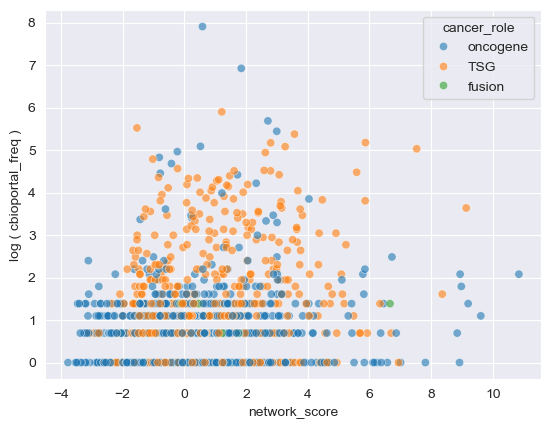

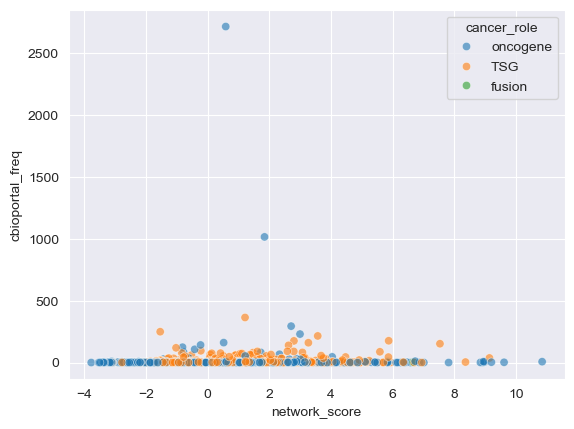

In [9]:
# plot network score vs cbioportal frequency
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_style('darkgrid')

# plot y as log scale
ns_data = ns_data[ns_data['cbioportal_freq'] > 0].reset_index(drop=True)
ns_data['log ( cbioportal_freq )'] = ns_data['cbioportal_freq'].apply(lambda x: np.log(x))
sns.scatterplot(data=ns_data, x='network_score', y='log ( cbioportal_freq )', alpha=0.6, hue="cancer_role")
plt.show()

sns.scatterplot(data=ns_data, x='network_score', y='cbioportal_freq', alpha=0.6, hue="cancer_role")
plt.show()


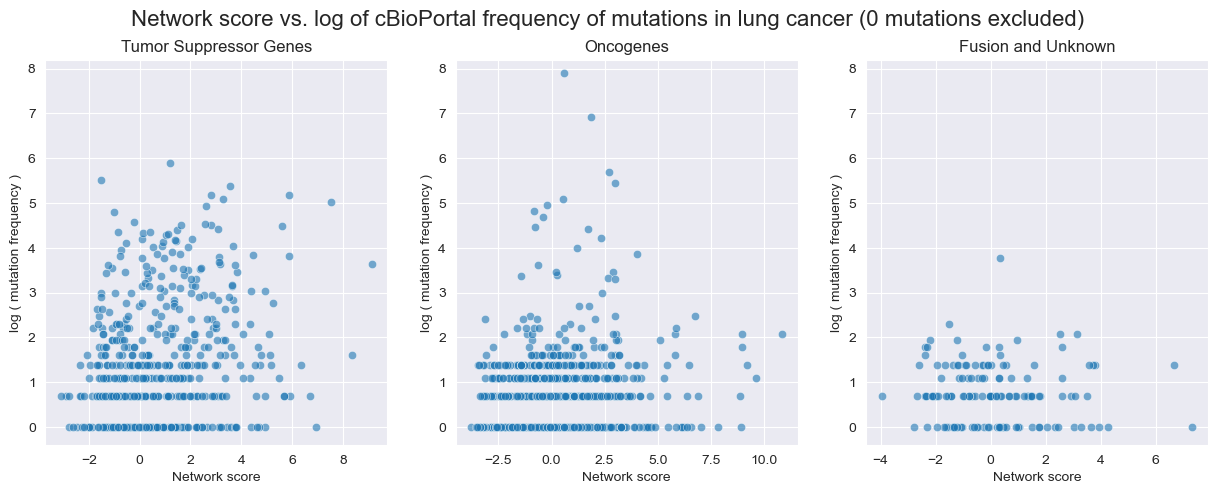

In [10]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.scatterplot(data=ns_data[ns_data['cancer_role']=='TSG'], x='network_score', y='log ( cbioportal_freq )', alpha=0.6, ax=axes[0],)
axes[0].set_ylim(-0.4, 8.2)
axes[0].set_title('Tumor Suppressor Genes')
sns.scatterplot(data=ns_data[ns_data['cancer_role']=='oncogene'], x='network_score', y='log ( cbioportal_freq )', alpha=0.6, ax=axes[1])
axes[1].set_ylim(-0.4, 8.2)
axes[1].set_title('Oncogenes')
sns.scatterplot(data=ns_data[~ns_data['cancer_role'].isin(['TSG','oncogene'])], x='network_score', y='log ( cbioportal_freq )', alpha=0.6, ax=axes[2])
axes[2].set_ylim(-0.4, 8.2)
axes[2].set_title('Fusion and Unknown')
for i in range(3):
    axes[i].set_xlabel('Network score')
    axes[i].set_ylabel('log ( mutation frequency )')

plt.suptitle('Network score vs. log of cBioPortal frequency of mutations in lung cancer (0 mutations excluded)', fontsize=16)
plt.show()

# mutation specific: considering amino acid changes

In [11]:
# read txt but separated by tab
df = pd.read_csv('mutations.txt', sep='\t')
df

,STUDY_ID,SAMPLE_ID,EGFR,KRAS,BRAF,MAP2K1,EED,KDR,FGFR2,ERBB2,...,TPR,HIP1,MAP2K2,EML4,MB21D2,PTPRT,RFWD3,KEAP1,TP53,ALK
0,luad_broad,LUAD-YINHD,WT,WT,WT,WT,WT,X419_splice,WT,WT,...,R1698L,WT,WT,WT,Q311E,P577S L830F,WT,G419W,R273L,WT
1,luad_broad,LUAD-CHTN-MAD06-00668,WT,WT,WT,WT,WT,W485C,WT,WT,...,WT,WT,WT,WT,WT,H550Q T1393N F1336L P670H,WT,WT,R273P,WT
2,luad_broad,LUAD-S01315,WT,WT,WT,WT,WT,S1037T,WT,WT,...,S480C A475G Q32*,WT,WT,I54M,WT,WT,WT,WT,X225_splice,WT
3,luad_broad,LUAD-S01357,WT,G13C,WT,M146I,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,R273L,WT
4,luad_broad,LUAD_E00522,WT,WT,WT,WT,WT,P263T,WT,WT,...,WT,WT,WT,WT,R151W,G140V,WT,WT,V274F,WT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14256,lung_msk_pdx,P-0000636-T01-IM3,E746_A750del,WT,WT,WT,WT,WT,WT,WT,...,NS,NS,WT,NS,NS,WT,NS,WT,WT,WT
14257,lung_msk_pdx,P-0000543-T01-IM3,WT,WT,WT,WT,WT,WT,WT,WT,...,NS,NS,WT,NS,NS,WT,NS,WT,G266R,WT
14258,lung_msk_pdx,P-0000339-T01-IM3,WT,WT,WT,WT,WT,WT,WT,WT,...,NS,NS,WT,NS,NS,WT,NS,WT,R342*,WT
14259,lung_msk_pdx,P-0005544-T01-IM5,WT,G12A,WT,WT,WT,G1048V,WT,WT,...,NS,NS,WT,NS,NS,WT,NS,WT,WT,WT


In [12]:
from collections import Counter

lung_counts = {}

for gene in df.columns[2:]:
    nums= []
    for mutation in df[gene]:


        # only extract integers that follow the format "<letter><integer><letter>" - that is missense only
        mutation = re.findall(r'[A-Z][0-9]+[A-Z]', mutation) 
        for m in mutation:
            # Extract the integer from the mutation
            # m = re.findall(r'\d+', m)[0]
            nums.append(m)

    # Count the occurrences of each integer
    lung_counts[gene] = Counter(nums)

lung_counts

{'EGFR': Counter({'L858R': 1016,
          'T790M': 295,
          'L861Q': 103,
          'G719A': 88,
          'S768I': 86,
          'C797S': 49,
          'G719C': 43,
          'G719S': 31,
          'L62R': 24,
          'L833V': 23,
          'E709A': 14,
          'E709K': 14,
          'L747P': 12,
          'D761Y': 12,
          'A755G': 11,
          'L718V': 10,
          'L747S': 9,
          'V834L': 9,
          'A289V': 8,
          'G917R': 8,
          'T751P': 7,
          'A750P': 7,
          'V769L': 7,
          'K745R': 7,
          'S752F': 6,
          'R776C': 6,
          'L707W': 6,
          'V765L': 6,
          'S306L': 6,
          'R521K': 6,
          'A871G': 5,
          'G1185S': 5,
          'G724S': 5,
          'C797G': 5,
          'L861R': 5,
          'L833F': 5,
          'K754E': 5,
          'L718Q': 5,
          'D1012V': 5,
          'V845L': 5,
          'L747Q': 4,
          'A289T': 4,
          'R108K': 4,
          'H870R': 4,
   

In [13]:
aa_properties = pd.read_csv("../data_prep/aa_properties.csv")
# make dictionary of aa1:Acid Type
aa_properties = dict(zip(aa_properties['aa1'], aa_properties['Acid Type']))
aa_properties

{'I': 'Hydrophobic',
 'A': 'Hydrophobic',
 'F': 'Hydrophobic',
 'L': 'Hydrophobic',
 'M': 'Hydrophobic',
 'P': 'Special cases',
 'V': 'Hydrophobic',
 'W': 'Hydrophobic',
 'C': 'Special cases',
 'G': 'Special cases',
 'T': 'Polar uncharged',
 'S': 'Polar uncharged',
 'Y': 'Hydrophobic',
 'Q': 'Polar uncharged',
 'N': 'Polar uncharged',
 'H': 'Polar charged positive',
 'K': 'Polar charged positive',
 'E': 'Polar charged negative',
 'R': 'Polar charged positive',
 'D': 'Polar charged negative'}

In [14]:
cancer_roles = pd.read_csv("../lung_cancer/lung_genes_sbna.csv")
# for each gene, get the cancer_role
cancer_roles = dict(zip(cancer_roles['gene'], cancer_roles['cancer_role']))

In [15]:
all_mutation_counts = []
for gene, counts in lung_counts.items():
    # sum all counts for each gene
    total = sum(counts.values())

    for mutation, count in counts.items():
        wt_aa = mutation[0]
        position = mutation[1:-1]
        mut_aa = mutation[-1]
        wt_aa_type = aa_properties[wt_aa]
        mut_aa_type = aa_properties[mut_aa]
        aa_type_change = wt_aa_type + ' - ' + mut_aa_type
        perc = count / total
        try:
            cancer_role = cancer_roles[gene]
        except:
            continue
        all_mutation_counts.append({'gene': gene, 'wt_aa': wt_aa, 'position': position, 'mut_aa': mut_aa, 'count': count, 'perc': perc, 'wt_aa_type': wt_aa_type, 'mut_aa_type': mut_aa_type, 'aa_type_change': aa_type_change, 'cancer_role': cancer_role})
all_mutation_counts = pd.DataFrame(all_mutation_counts)
all_mutation_counts.head()

,gene,wt_aa,position,mut_aa,count,perc,wt_aa_type,mut_aa_type,aa_type_change,cancer_role
0,EGFR,R,1100,S,2,0.000851,Polar charged positive,Polar uncharged,Polar charged positive - Polar uncharged,oncogene
1,EGFR,R,574,L,1,0.000425,Polar charged positive,Hydrophobic,Polar charged positive - Hydrophobic,oncogene
2,EGFR,L,633,F,2,0.000851,Hydrophobic,Hydrophobic,Hydrophobic - Hydrophobic,oncogene
3,EGFR,H,1129,Y,2,0.000851,Polar charged positive,Hydrophobic,Polar charged positive - Hydrophobic,oncogene
4,EGFR,Q,1020,H,1,0.000425,Polar uncharged,Polar charged positive,Polar uncharged - Polar charged positive,oncogene


In [16]:
all_mutation_counts.sort_values(by='count', ascending=False).head(30)

,gene,wt_aa,position,mut_aa,count,perc,wt_aa_type,mut_aa_type,aa_type_change,cancer_role
251,KRAS,G,12,C,1381,0.433731,Special cases,Special cases,Special cases - Special cases,oncogene
11,EGFR,L,858,R,1016,0.432157,Hydrophobic,Polar charged positive,Hydrophobic - Polar charged positive,oncogene
249,KRAS,G,12,V,512,0.160804,Special cases,Hydrophobic,Special cases - Hydrophobic,oncogene
252,KRAS,G,12,D,412,0.129397,Special cases,Polar charged negative,Special cases - Polar charged negative,oncogene
12,EGFR,T,790,M,295,0.125479,Polar uncharged,Hydrophobic,Polar uncharged - Hydrophobic,oncogene
250,KRAS,G,12,A,258,0.081030,Special cases,Hydrophobic,Special cases - Hydrophobic,oncogene
4901,TP53,V,157,F,158,0.026694,Hydrophobic,Hydrophobic,Hydrophobic - Hydrophobic,TSG
4905,TP53,R,158,L,140,0.023653,Polar charged positive,Hydrophobic,Polar charged positive - Hydrophobic,TSG
4898,TP53,R,273,L,131,0.022132,Polar charged positive,Hydrophobic,Polar charged positive - Hydrophobic,TSG
311,BRAF,V,600,E,123,0.204319,Hydrophobic,Polar charged negative,Hydrophobic - Polar charged negative,oncogene


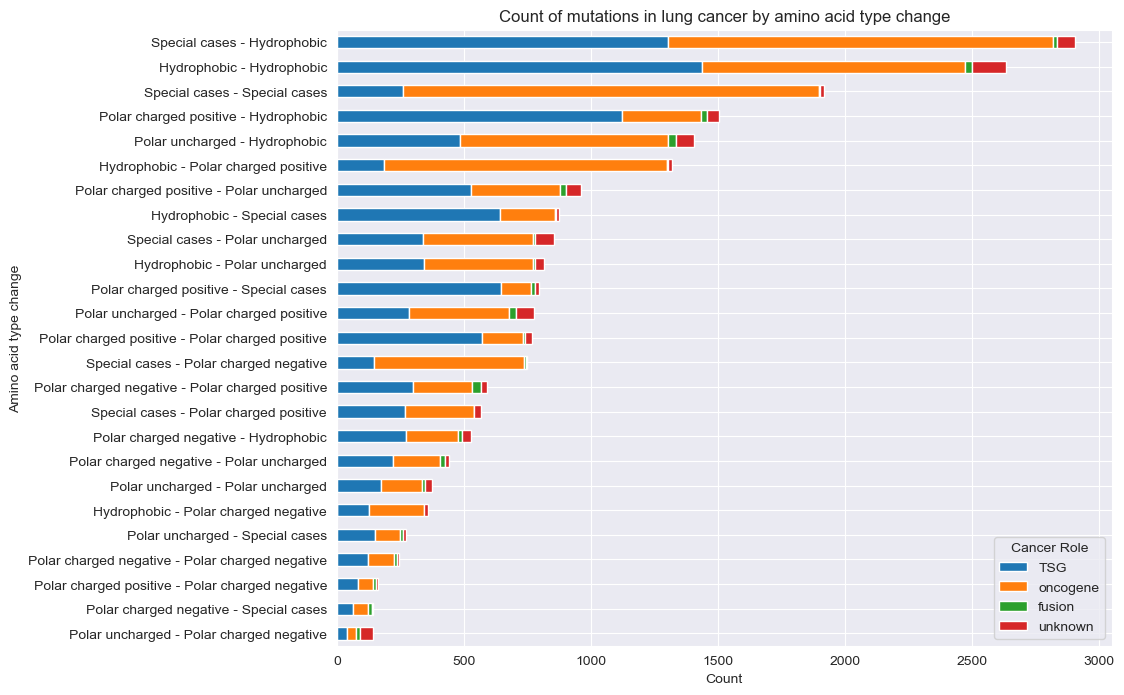

In [17]:
# fill nan in cancer_role with 'Unknown'
all_mutation_counts['cancer_role'] = all_mutation_counts['cancer_role'].fillna('unknown') 
df_grouped = all_mutation_counts.groupby(['aa_type_change', 'cancer_role'], dropna=False)['count'].sum().unstack(fill_value=0)[["TSG", "oncogene", "fusion", "unknown"]]

# Calculate the total count for each amino acid type change
df_grouped['total'] = df_grouped.sum(axis=1)

# Sort the DataFrame by the total count in descending order
df_grouped_sorted = df_grouped.sort_values('total', ascending=True).drop(columns='total')

# Plot the stacked bar chart
df_grouped_sorted.plot(kind='barh', stacked=True, figsize=(10, 8))

# Customize the plot
plt.title('Count of mutations in lung cancer by amino acid type change')
plt.xlabel('Count')
plt.ylabel('Amino acid type change')
plt.legend(title='Cancer Role')
plt.show()

* mutations involving polar charged negative not very common. This could relate to our previous findings about network scores of polar charged negative being the lowest compared to others. so mutatoins in lung cancer tend not to happen so as to decrease the network scores?
* mutations that change an amino acid type to hydrophobic very common. lung cancer tends to mutate amino acids to a hydrophobic type. this could relate to our previous findings...about how hydrophobic amino acids tend to have higher NS. so mutations could want to increase the network scores (increase stability?)
* so conclusion, lung cancer mutations tend to favour mutations that increase network scores, and not decrease?

In [18]:
ns_data = pd.read_csv("../lung_cancer/diff_aas_as_rows.csv")
ns_data['uniprot_num'] = ns_data['uniprot_num'].astype(int)
all_mutation_counts['position'] = all_mutation_counts['position'].astype(int)
ns_data.head(2)

,gene,cancer_role,cgc_tier,uniprot_num,wt_aa,mut_aa,wt_ns,mut_ns,diff_ns,wt_sd,...,count_TCGA-LUAD,total_TCGA-LUAD,perc_TCGA-LUAD,count_TCGA-LUSC,total_TCGA-LUSC,perc_TCGA-LUSC,count_all_lung,total_all_lung,perc_all_lung,cmc_tier
0,AKT1,oncogene,1,17,E,K,0.217918,0.178303,-0.039615,-0.232960,...,2,559,0.36,0,0,0.0,2,559,0.003578,1
1,ALK,oncogene,1,1275,R,Q,0.656542,4.539066,3.882524,-0.407015,...,0,0,0.00,0,0,0.0,0,0,0.000000,NaN


In [19]:
all_mutation_counts = all_mutation_counts.drop(columns=['cancer_role'])
# rename count to cbioportal_freq
all_mutation_counts = all_mutation_counts.rename(columns={'count': 'cbioportal_freq'})



In [20]:
ns_data = ns_data.merge(all_mutation_counts, left_on=['gene', 'uniprot_num', 'wt_aa', 'mut_aa'], right_on=['gene', 'position', 'wt_aa', 'mut_aa'] ,how='inner')
ns_data

,gene,cancer_role,cgc_tier,uniprot_num,wt_aa,mut_aa,wt_ns,mut_ns,diff_ns,wt_sd,...,count_all_lung,total_all_lung,perc_all_lung,cmc_tier,position,cbioportal_freq,perc,wt_aa_type,mut_aa_type,aa_type_change
0,AKT1,oncogene,1,17,E,K,0.217918,0.178303,-0.039615,-0.232960,...,2,559,0.003578,1,17,32,0.426667,Polar charged negative,Polar charged positive,Polar charged negative - Polar charged positive
1,ALK,oncogene,1,1174,F,L,2.649683,1.324058,-1.325624,0.714982,...,0,0,0.000000,1,1174,5,0.009747,Hydrophobic,Hydrophobic,Hydrophobic - Hydrophobic
2,BRAF,oncogene,1,600,V,E,-0.641199,-0.615279,0.025920,-0.482902,...,8,559,0.014311,1,600,123,0.204319,Hydrophobic,Polar charged negative,Hydrophobic - Polar charged negative
3,EGFR,oncogene,1,858,L,R,1.844056,1.565000,-0.279056,0.380781,...,23,1049,0.021926,1,858,1016,0.432157,Hydrophobic,Polar charged positive,Hydrophobic - Polar charged positive
4,KRAS,oncogene,1,12,G,V,0.586749,0.347473,-0.239276,0.168119,...,40,1049,0.038132,1,12,512,0.160804,Special cases,Hydrophobic,Special cases - Hydrophobic
5,KRAS,oncogene,1,12,G,D,0.586749,0.113179,-0.473571,0.168119,...,18,559,0.032200,1,12,412,0.129397,Special cases,Polar charged negative,Special cases - Polar charged negative
6,KRAS,oncogene,1,12,G,C,0.586749,-0.025027,-0.611776,0.168119,...,56,559,10.020000,1,12,1381,0.433731,Special cases,Special cases,Special cases - Special cases
7,KRAS,oncogene,1,118,C,S,2.668864,0.740280,-1.928584,0.893803,...,1,490,0.200000,Other,118,3,0.000942,Special cases,Polar uncharged,Special cases - Polar uncharged
8,TP53,TSG,1,272,V,M,2.274262,3.801006,1.526744,1.240281,...,1,559,0.001789,2,272,19,0.003210,Hydrophobic,Hydrophobic,Hydrophobic - Hydrophobic
9,TP53,TSG,1,273,R,H,1.047494,1.183051,0.135557,0.214108,...,4,1049,0.003813,1,273,96,0.016219,Polar charged positive,Polar charged positive,Polar charged positive - Polar charged positive


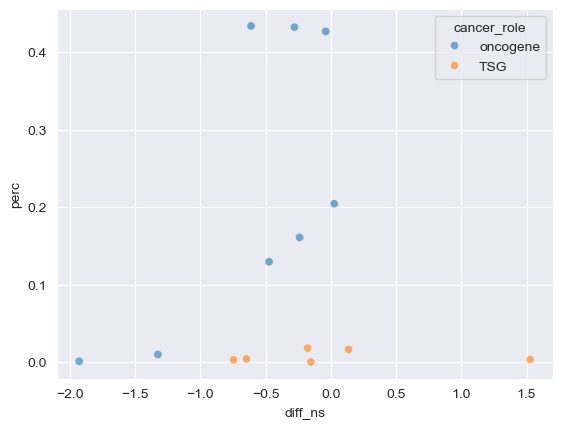

In [21]:
# plot diff_ns against cbioportal_freq
sns.scatterplot(data=ns_data, x='diff_ns', y='perc', alpha=0.6, hue="cancer_role")
plt.show()


In [22]:
mutant_structs = pd.read_csv("../lung_cancer/lung_genes_sbna.csv")
mutant_structs = mutant_structs.drop_duplicates(subset=['gene', 'mutations']) # unique gene, mutations
mutant_structs = mutant_structs[['gene', 'mutations']]
mutant_structs = mutant_structs[mutant_structs['mutations'].notna()] # rows where mutations is not nan
for _, row in mutant_structs.iterrows():
    gene = row['gene']
    mutations = row['mutations'].split(',')
    if gene in lung_counts and any(mut in lung_counts[gene] for mut in mutations):
        print(f"{gene}: {row["mutations"]}")        

AKT1: E17K
ALK: F1174L
BRAF: V600E
EGFR: L858R
KRAS: G12C
KRAS: G12D
KRAS: G12V
TP53: R273H
TP53: R273C
TP53: R273C, T284R
TP53: V272M
TP53: R280K
